<a href="https://colab.research.google.com/github/LuisaPolicarpo/Project5/blob/main/Prediction_2022_2023_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* 1 Criar df com a prediction dos dados de overnight entre 11/2022 até 12/2023, utilizando dos dados de 01/2020 a 11/2022
* 2 Criar um test e um train set
* 3 Verificar neste train e test, em qual dos modelos (ARIMA, SARIMA, Exponential Smoothing e Linear Regression(Trend)+Avg(Seasonality)) obtemos o menor MSE (mean square error)
* 4 O modelo com menor MSE, deverá ser o usado para prever os dados de 2023.

In [ ]:
import pandas as pd

In [ ]:
link_2017_2022 = 'https://raw.githubusercontent.com/LuisaPolicarpo/Project5/main/df_final_2017_2022.csv'
df_2017_2022 = pd.read_csv(link_2017_2022)

In [ ]:
df_2017_2022.sort_values(by='Date', inplace=True)

In [ ]:
df_2017_2022['Date'] = pd.to_datetime(df_2017_2022['Date'])

In [ ]:
df_2017_2022.set_index('Date', inplace=True)

In [ ]:
df=df_2017_2022
df=df.tail(35) #selecionar somente o intervalo 01/2020 a 11/2022

In [ ]:
#df['Date'] = pd.to_datetime(df['Date_mutation']) #DOUBT: why doesn't work?
#df.set_index('Date', inplace=True) #setting date as index

In [ ]:
#Defining the test si<e and the train size
test_size_percentage = 0.25 #8 months (from April to December 2019)
test_size = int(test_size_percentage * df.shape[0]) #8 lines
train_size_initial = df.shape[0] - test_size #27 lines

train_set = df['sleeps'].iloc[:train_size_initial] #1st 27 months after 01/2020
test_set = df['sleeps'].iloc[train_size_initial:] #last 8 months

In [ ]:
# length check
print(train_set.shape[0] + test_set.shape[0] == df.shape[0])

True


Calculate the mean square error on the ARIMA

In [ ]:
!pip install pmdarima
from pmdarima.arima import auto_arima

auto_arima(train_set) #What was this for? A: To obtain the best order, written bellow.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 76.3 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


ARIMA(order=(2, 0, 2), scoring_args={}, suppress_warnings=True)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

def arima_forecast(tme_sries):
  arima = ARIMA(tme_sries, order=(2, 0, 2)).fit()  #I obtained the values order() in auto_arima
  return arima.forecast().iloc[0]

evaluation_df = pd.DataFrame(range(0, test_size), columns = ['forecast'])
evaluation_df['test'] = list(test_set)
evaluation_df['forecast'] = evaluation_df['forecast']\
  .apply(lambda n: arima_forecast(df['sleeps'].iloc[:train_size_initial + n]))

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dat

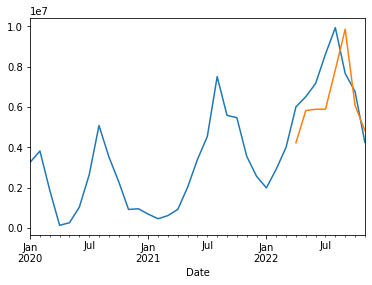

In [ ]:
df['sleeps'].plot()
evaluation_df.set_index(test_set.index)['forecast'].plot() #DOUBT:

In [ ]:
#EXPONENTIAL SMOOTHING
#DOUBT
from statsmodels.tsa.api import ExponentialSmoothing
def expsm_forecast(tme_sries):
  es = ExponentialSmoothing(tme_sries).fit(smoothing_level=0.1)
  return es.forecast().iloc[0]

evaluation_df = pd.DataFrame(range(0, test_size), columns = ['forecast'])
evaluation_df['test'] = list(test_set)
evaluation_df['forecast'] = evaluation_df['forecast']\
  .apply(lambda n: expsm_forecast(df['sleeps'].iloc[:train_size_initial + n])) #to do: a list of decimals in smoothing_level, the minor mse wins (hyper tunning). / Works in Gridsearch?

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dat

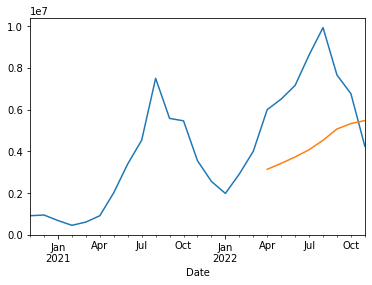

In [ ]:
#With the window re-sized
df['sleeps'].iloc[df.shape[0] - 60:].plot() #DOUBT: which interval should I put here? The values are so different
evaluation_df.set_index(test_set.index)['forecast'].iloc[evaluation_df.shape[0] - 60:].plot()

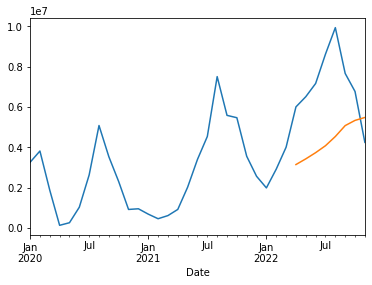

In [ ]:
#Without resizing the window
df['sleeps'].plot() #DOUBT: which interval should I put here? The values are so different
evaluation_df.set_index(test_set.index)['forecast'].plot()

Seasonal Decompose

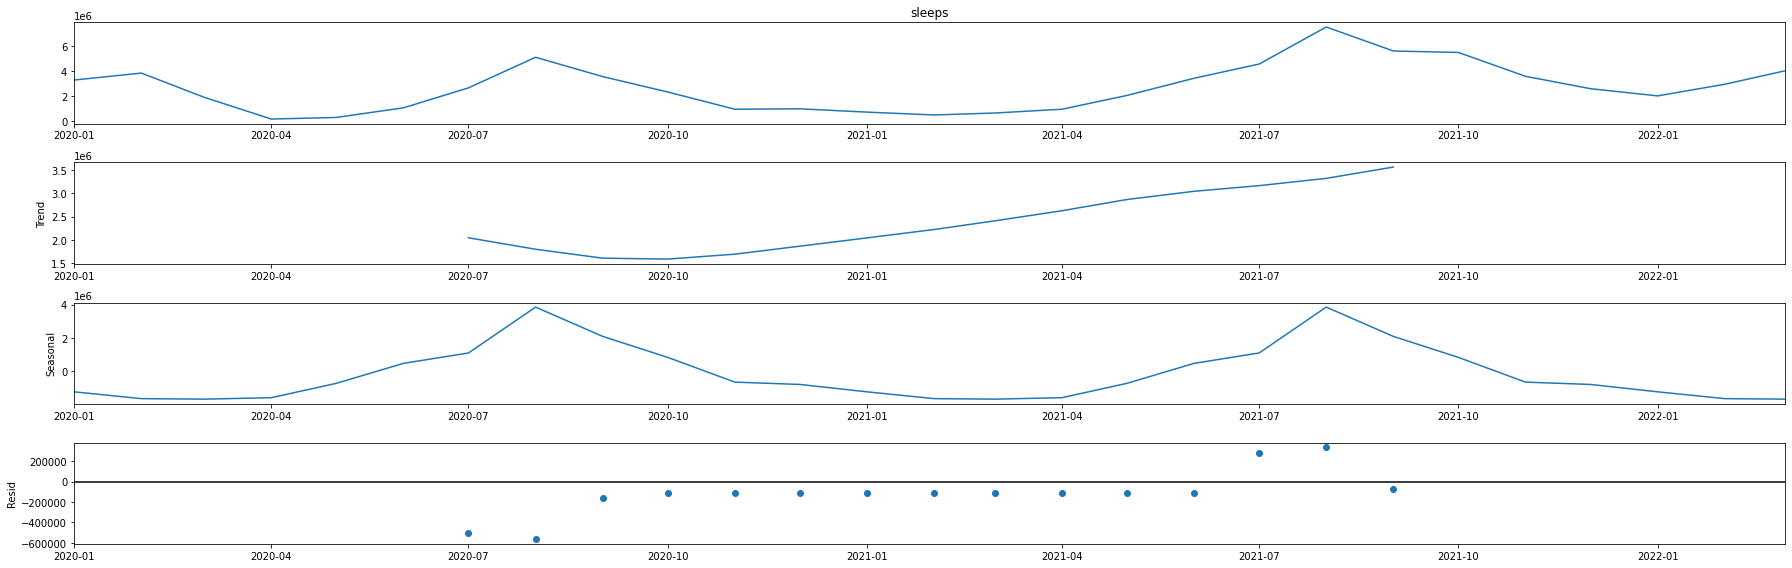

In [ ]:
#Seasonal decompose of the train set
import statsmodels.api as sm
from pylab import rcParams
import matplotlib.pyplot as plt
rcParams['figure.figsize'] = 25, 8

decomposition = sm.tsa.seasonal_decompose(x = train_set, period = 12, model='additive')
fig = decomposition.plot()
plt.show()

#Doubt: Why the trend finishes earlier than the end of the dataset? A: Because the model is using a method called central trend.

In [ ]:
#decomposition.trend
type(decomposition.trend)

pandas.core.series.Series

In [ ]:
#passar os valores da trend para dataframe
df_trend=decomposition.trend.to_frame()

In [ ]:
#pass test values to dataframe
df_test_set=test_set.to_frame()

In [ ]:
#insert an ID to the trend months
df_trend.insert(0, 'ID_trend', range(0, len(df_trend)))

In [ ]:
df_trend
#df_test_set

,ID_trend,trend
Date,,
2020-01-01,0,NaN
2020-02-01,1,NaN
2020-03-01,2,NaN
2020-04-01,3,NaN
2020-05-01,4,NaN
2020-06-01,5,NaN
2020-07-01,6,2.042767e+06
2020-08-01,7,1.795795e+06
2020-09-01,8,1.603424e+06


In [ ]:
#insert an ID to the test_set months
df_test_set.insert(0, 'ID_test', range(len(df_trend), len(df_trend)+len(df_test_set)))

In [ ]:
#transform the trend dataset in the same format of test_set dataset, removing Date from index
df_test_set.reset_index(inplace=True)
df_trend.reset_index(inplace=True)

In [ ]:
df_test_set


,Date,ID_test,sleeps
0,2022-04-01,27,6006236
1,2022-05-01,28,6511175
2,2022-06-01,29,7167299
3,2022-07-01,30,8623586
4,2022-08-01,31,9935751
5,2022-09-01,32,7664771
6,2022-10-01,33,6769497
7,2022-11-01,34,4246059


In [ ]:
df_trend

,Date,ID_trend,trend
0,2020-01-01,0,NaN
1,2020-02-01,1,NaN
2,2020-03-01,2,NaN
3,2020-04-01,3,NaN
4,2020-05-01,4,NaN
5,2020-06-01,5,NaN
6,2020-07-01,6,2.042767e+06
7,2020-08-01,7,1.795795e+06
8,2020-09-01,8,1.603424e+06
9,2020-10-01,9,1.583758e+06


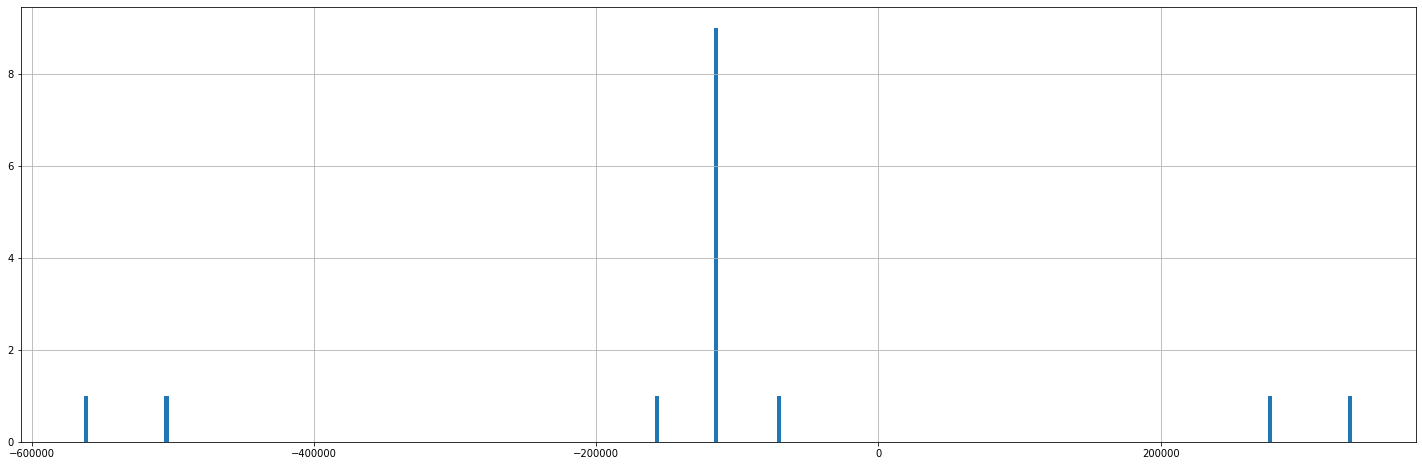

In [ ]:
#Residuals analysis
#decomposition.resid.describe()
#decomposition.resid.plot()
decomposition.resid.hist(bins=300) #DOUBT: Confirm with cristina if the more frequent number is a problem

Apply linear regression to the trend

In [ ]:
#Since the linear regression doens't work with NANs, we should clean first the NANs values from the trend.
df_trend.dropna(inplace=True)

In [ ]:
from sklearn.linear_model import LinearRegression
X = df_trend[['ID_trend']]
y = df_trend['trend']

modelLR2 = LinearRegression().fit(X, y)

X1 = df_test_set[['ID_test']]
y_pred = pd.Series(modelLR2.predict(X1), index=X1.index)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- ID_test
Feature names seen at fit time, yet now missing:
- ID_trend

  warnings.warn(message, FutureWarning)


In [ ]:
df_y_pred = y_pred.to_frame()

In [ ]:
df_y_pred

,0
0,4.333602e+06
1,4.472498e+06
2,4.611394e+06
3,4.750290e+06
4,4.889186e+06
5,5.028082e+06
6,5.166978e+06
7,5.305874e+06


In [ ]:
df_y_pred.insert(1, 'month', range(4, 12))
df_y_pred

,0,month
0,4.333602e+06,4
1,4.472498e+06,5
2,4.611394e+06,6
3,4.750290e+06,7
4,4.889186e+06,8
5,5.028082e+06,9
6,5.166978e+06,10
7,5.305874e+06,11


In [ ]:
df_y_pred.rename(columns = {0:'Prediction_Trend'}, inplace = True)
df_y_pred

,Prediction_Trend,month
0,4.333602e+06,4
1,4.472498e+06,5
2,4.611394e+06,6
3,4.750290e+06,7
4,4.889186e+06,8
5,5.028082e+06,9
6,5.166978e+06,10
7,5.305874e+06,11


In [ ]:
link = 'https://raw.githubusercontent.com/LuisaPolicarpo/Project5/main/seasonality_20_22.csv' #DF da Ana acerca da seasonality do ano tipo - média por cada mês, desde 2020-2022
df_season = pd.read_csv(link)

In [ ]:
#Turn df_season the same size as df_y_pred, so we can concat

df_season_test=df_season.iloc[3:11]
df_season_test.reset_index(inplace=True, drop=True)
df_season_test

,Unnamed: 0,months,seasonality_avg
0,3,4,-1.590296e+06
1,4,5,-7.290059e+05
2,5,6,4.715805e+05
3,6,7,1.094641e+06
4,7,8,3.849623e+06
5,8,9,2.089022e+06
6,9,10,8.301892e+05
7,10,11,-6.562779e+05


In [ ]:
df_season_test.drop(['Unnamed: 0'], axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
df_season_test

,months,seasonality_avg
0,4,-1.590296e+06
1,5,-7.290059e+05
2,6,4.715805e+05
3,7,1.094641e+06
4,8,3.849623e+06
5,9,2.089022e+06
6,10,8.301892e+05
7,11,-6.562779e+05


In [ ]:
df_final = pd.concat([df_season_test, df_y_pred], axis=1)
df_final.drop(['months'], axis=1, inplace=True)
df_final['Sum']=df_final['seasonality_avg']+df_final['Prediction_Trend']
df_final

,seasonality_avg,Prediction_Trend,month,Sum
0,-1.590296e+06,4.333602e+06,4,2.743306e+06
1,-7.290059e+05,4.472498e+06,5,3.743492e+06
2,4.715805e+05,4.611394e+06,6,5.082974e+06
3,1.094641e+06,4.750290e+06,7,5.844931e+06
4,3.849623e+06,4.889186e+06,8,8.738809e+06
5,2.089022e+06,5.028082e+06,9,7.117104e+06
6,8.301892e+05,5.166978e+06,10,5.997167e+06
7,-6.562779e+05,5.305874e+06,11,4.649596e+06


In [ ]:
#Calculate the mean square error, to compare with the other methods and choose the smaller one
from sklearn.metrics import mean_squared_error
mean_squared_error(df_test_set['sleeps'], df_final['Sum']) #13 digitos, preciso de comparar aos outros MSE dos outros modelos (Luisa Policarpo)

4108008446867.7524

In [ ]:
prediction_index = [number for number in range(35, 48)] # 36(01/12/2022) a 47(01/12/2023)

In [ ]:
prediction_index = pd.DataFrame(prediction_index)

In [ ]:
prediction_index['Date'] = pd.date_range(start='2022-12-01', periods=len(prediction_index), freq='MS')
prediction_index.rename(columns = {0:'months'}, inplace = True)

In [ ]:
prediction_index

,months,Date
0,35,2022-12-01
1,36,2023-01-01
2,37,2023-02-01
3,38,2023-03-01
4,39,2023-04-01
5,40,2023-05-01
6,41,2023-06-01
7,42,2023-07-01
8,43,2023-08-01
9,44,2023-09-01


In [ ]:
from sklearn.linear_model import LinearRegression
X = df_trend[['ID_trend']]
y = df_trend['trend']

modelLR2 = LinearRegression().fit(X, y)

X2 = prediction_index[['months']]
y_pred_trend_2023 = pd.Series(modelLR2.predict(X2), index=X2.index)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- months
Feature names seen at fit time, yet now missing:
- ID_trend

  warnings.warn(message, FutureWarning)


In [ ]:
df_pred_trend_2023 = y_pred_trend_2023.to_frame() 

In [ ]:
df_pred_trend_2023['Date'] = prediction_index['Date'] #all trend predicted values from the trend since 01/12/2022 untill 01/12/2023

In [ ]:
df_pred_trend_2023['months'] =  prediction_index['months']
df_pred_trend_2023

,0,Date,months
0,5.444770e+06,2022-12-01,35
1,5.583666e+06,2023-01-01,36
2,5.722562e+06,2023-02-01,37
3,5.861458e+06,2023-03-01,38
4,6.000354e+06,2023-04-01,39
5,6.139250e+06,2023-05-01,40
6,6.278146e+06,2023-06-01,41
7,6.417042e+06,2023-07-01,42
8,6.555938e+06,2023-08-01,43
9,6.694834e+06,2023-09-01,44


In [ ]:
df_pred_trend_2023.rename(columns = {0:'Pred_Trend'}, inplace = True)

In [ ]:
df_pred_trend_2023

,Pred_Trend,Date,months
0,5.444770e+06,2022-12-01,35
1,5.583666e+06,2023-01-01,36
2,5.722562e+06,2023-02-01,37
3,5.861458e+06,2023-03-01,38
4,6.000354e+06,2023-04-01,39
5,6.139250e+06,2023-05-01,40
6,6.278146e+06,2023-06-01,41
7,6.417042e+06,2023-07-01,42
8,6.555938e+06,2023-08-01,43
9,6.694834e+06,2023-09-01,44


In [ ]:
df_repeated = pd.concat([df_season]*2, ignore_index=True)

In [ ]:
df_repeated

,Unnamed: 0,months,seasonality_avg
0,0,1,-1.238774e+06
1,1,2,-1.647422e+06
2,2,3,-1.678103e+06
3,3,4,-1.590296e+06
4,4,5,-7.290059e+05
5,5,6,4.715805e+05
6,6,7,1.094641e+06
7,7,8,3.849623e+06
8,8,9,2.089022e+06
9,9,10,8.301892e+05


In [ ]:
df_repeated = df_repeated.drop([0,1,2,3,4,5,6,7,8,9,10])
df_repeated.drop(['Unnamed: 0'], axis=1, inplace=True)
df_repeated

,months,seasonality_avg
11,12,-7.951767e+05
12,1,-1.238774e+06
13,2,-1.647422e+06
14,3,-1.678103e+06
15,4,-1.590296e+06
16,5,-7.290059e+05
17,6,4.715805e+05
18,7,1.094641e+06
19,8,3.849623e+06
20,9,2.089022e+06


In [ ]:
df_pred_trend_2023

,Pred_Trend,Date,months
0,5.444770e+06,2022-12-01,35
1,5.583666e+06,2023-01-01,36
2,5.722562e+06,2023-02-01,37
3,5.861458e+06,2023-03-01,38
4,6.000354e+06,2023-04-01,39
5,6.139250e+06,2023-05-01,40
6,6.278146e+06,2023-06-01,41
7,6.417042e+06,2023-07-01,42
8,6.555938e+06,2023-08-01,43
9,6.694834e+06,2023-09-01,44


In [ ]:
df_repeated.reset_index(inplace=True, drop=True)
df_finalpred_2020_2023 = pd.concat([df_pred_trend_2023, df_repeated], axis=1)
df_finalpred_2020_2023

,Pred_Trend,Date,months,months,seasonality_avg
0,5.444770e+06,2022-12-01,35,12,-7.951767e+05
1,5.583666e+06,2023-01-01,36,1,-1.238774e+06
2,5.722562e+06,2023-02-01,37,2,-1.647422e+06
3,5.861458e+06,2023-03-01,38,3,-1.678103e+06
4,6.000354e+06,2023-04-01,39,4,-1.590296e+06
5,6.139250e+06,2023-05-01,40,5,-7.290059e+05
6,6.278146e+06,2023-06-01,41,6,4.715805e+05
7,6.417042e+06,2023-07-01,42,7,1.094641e+06
8,6.555938e+06,2023-08-01,43,8,3.849623e+06
9,6.694834e+06,2023-09-01,44,9,2.089022e+06


In [ ]:
df_finalpred_2020_2023['Overnight_Pred'] = df_finalpred_2020_2023['Pred_Trend'] + df_finalpred_2020_2023['seasonality_avg']
df_finalpred_2020_2023

,Pred_Trend,Date,months,months,seasonality_avg,Overnight_Pred
0,5.444770e+06,2022-12-01,35,12,-7.951767e+05,4.649593e+06
1,5.583666e+06,2023-01-01,36,1,-1.238774e+06,4.344892e+06
2,5.722562e+06,2023-02-01,37,2,-1.647422e+06,4.075140e+06
3,5.861458e+06,2023-03-01,38,3,-1.678103e+06,4.183355e+06
4,6.000354e+06,2023-04-01,39,4,-1.590296e+06,4.410058e+06
5,6.139250e+06,2023-05-01,40,5,-7.290059e+05,5.410244e+06
6,6.278146e+06,2023-06-01,41,6,4.715805e+05,6.749726e+06
7,6.417042e+06,2023-07-01,42,7,1.094641e+06,7.511683e+06
8,6.555938e+06,2023-08-01,43,8,3.849623e+06,1.040556e+07
9,6.694834e+06,2023-09-01,44,9,2.089022e+06,8.783856e+06


In [ ]:
df_finalpred_2020_2023.columns

Index(['Pred_Trend', 'Date', 'months', 'months', 'seasonality_avg',
       'Overnight_Pred'],
      dtype='object')

Lineplot of prediction 12/2022 to 12/2023, from the data range (01/2020 to 12/2022)

In [ ]:
df_finalpred_data=df_finalpred_2020_2023.drop(['Pred_Trend', 'months', 'seasonality_avg' ], axis=1)

In [ ]:
link_2017_2022 = 'https://raw.githubusercontent.com/LuisaPolicarpo/Project5/main/df_final_2017_2022.csv'
df_2017_2022_date= pd.read_csv(link_2017_2022)
df_2017_2022_date.sort_values(by='Date', inplace=True)
df_2017_2022_date.reset_index(inplace=True, drop=True)

In [ ]:
df_2017_2022_date['Date_2'] = pd.to_datetime(df_2017_2022_date['Date'], format='%Y-%m-%d')
df_2017_2022_date.drop(['Date'], axis=1, inplace=True)
df_2017_2022_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   sleeps  71 non-null     int64         
 1   Date_2  71 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.2 KB


In [ ]:
df_2017_2022_date.rename(columns={'Date_2': 'Date'}, inplace=True, errors='raise')

In [ ]:
df_real_pred = pd.concat([df_2017_2022_date, df_finalpred_data], axis=0)

In [ ]:
df_real_pred.rename(columns = {'sleeps':'Overnight_real'}, inplace = True)

In [ ]:
df_real_pred['Date'] = pd.to_datetime(df_real_pred['Date'], format='%Y-%m-%d')

In [ ]:
import plotly.express as px

fig = px.line(df_real_pred, x='Date', y=['Overnight_real', 'Overnight_Pred'])
fig.show()